# Data

In [550]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [551]:
data = pd.read_csv("analysis_data/analysis_data.csv", index_col = [0])
data["child_mortality"] = data["child_mortality"].astype(int)
data["food_supply"] -= data["food_supply"].mean()
data["food_supply"] /= data["food_supply"].std()
data["med_beds"] -= data["med_beds"].mean()
data["med_beds"] /= data["med_beds"].std()
data["co2_emission"] -= data["co2_emission"].mean()
data["co2_emission"] /= data["co2_emission"].std()
data

,country,child_mortality,food_supply,med_beds,co2_emission
0,Afghanistan,60,-2.628914,-1.253230,-1.053513
1,Albania,8,0.827992,-0.268085,-0.809412
2,United Arab Emirates,7,0.547358,-0.856770,2.810071
3,Argentina,9,0.611138,0.628958,-0.294170
4,Armenia,12,-0.072589,0.332613,-0.754599
...,...,...,...,...,...
101,United States,6,1.792354,-0.288108,1.885356
102,Uzbekistan,20,-0.064936,0.128376,-0.607822
103,St. Vincent and the Grenadines,15,-0.189946,0.252520,-0.734790
104,Vietnam,20,0.006498,-0.360192,-0.689991


In [552]:
data["child_mortality"].mean()

12.754716981132075

In [553]:
data["child_mortality"].std()

13.412724108635635

In [554]:
data["food_supply"].mean()

-4.021940013736416e-16

In [555]:
data["food_supply"].std()

0.9999999999999999

In [556]:
data["med_beds"].mean()

6.074805229081045e-17

In [557]:
data["med_beds"].std()

1.0

In [558]:
data["co2_emission"].mean()

6.912709398609465e-17

In [559]:
data["co2_emission"].std()

1.0

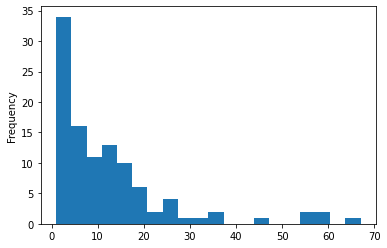

In [560]:
data['child_mortality'].plot.hist(bins=20)
plt.show()

# Prior

In [574]:
model_prior=CmdStanModel(stan_file='prior.stan')

sim=model_prior.sample(data={}, fixed_param=True, iter_sampling=1000, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [575]:
df_prior = sim.draws_pd()
df_prior

,lp__,accept_stat__,alpha,lambda,child_mortality,food_supply_coef,co2_emission_coef,med_beds_coef,food_supply,co2_emission,med_beds
0,0.0,0.0,2.017230,9.452680,10.0,0.123204,0.104408,0.242137,-0.462912,0.336103,1.036640
1,0.0,0.0,2.828980,24.855800,27.0,0.240074,0.245520,0.119095,1.098560,0.777185,-0.591441
2,0.0,0.0,2.619430,11.218400,12.0,0.222264,0.085142,0.022159,-1.069930,-0.115935,2.067080
3,0.0,0.0,1.881510,5.375800,7.0,0.000198,0.171381,0.135369,0.584563,-0.516417,-0.821550
4,0.0,0.0,2.101650,8.215320,11.0,0.198773,0.217157,0.183945,0.884829,-0.537570,-0.297882
...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.297500,1.514930,3.0,0.165378,0.259652,0.106544,1.628020,-0.857789,0.669765
996,0.0,0.0,3.645480,55.805000,49.0,0.153876,0.340561,0.107576,-0.088333,0.655423,1.550160
997,0.0,0.0,-0.762843,0.200862,0.0,0.224613,0.281309,0.240665,-0.546132,-1.253790,-1.524630
998,0.0,0.0,1.922050,6.243960,7.0,0.176005,0.295197,0.212402,0.191679,0.152401,-0.796433


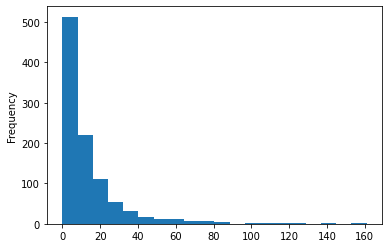

In [593]:
df_prior['child_mortality'].plot.hist(bins=20)
plt.show()

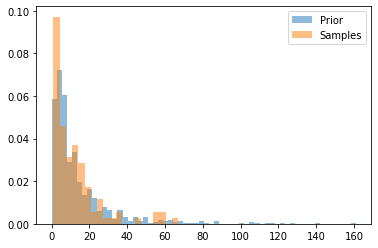

In [594]:
fig, ax = plt.subplots()
ax.hist(df_prior['child_mortality'], bins=60, alpha=0.5, density=True, label='Prior')
ax.hist(data["child_mortality"], bins=20, alpha=0.5, density=True, label='Samples')
ax.legend()
plt.show()

In [608]:
abs(df_prior['child_mortality'].mean() - data['child_mortality'].mean())

1.4352830188679242

# Model fitting

In [596]:
model_1=CmdStanModel(stan_file='posterior_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [597]:
fit_1=model_1.sample(data=dict(N=len(data), child_mortality=data.child_mortality.values, co2_emission=data.co2_emission.values, food_supply=data.food_supply.values, med_beds=data.med_beds.values), seed=20052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)





chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [598]:
df_fit_1 = fit_1.draws_pd()
df_fit_1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,co2_emission_coef,food_supply_coef,...,predicted_child_mortality[97],predicted_child_mortality[98],predicted_child_mortality[99],predicted_child_mortality[100],predicted_child_mortality[101],predicted_child_mortality[102],predicted_child_mortality[103],predicted_child_mortality[104],predicted_child_mortality[105],predicted_child_mortality[106]
0,2386.67,0.827082,0.464002,3.0,7.0,0.0,-2381.15,2.33075,-0.095910,-0.467588,...,8.0,16.0,7.0,10.0,11.0,5.0,9.0,15.0,13.0,38.0
1,2384.82,0.792054,0.464002,3.0,7.0,0.0,-2383.52,2.31647,-0.089831,-0.450515,...,5.0,3.0,5.0,5.0,6.0,3.0,8.0,11.0,5.0,35.0
2,2383.20,0.885331,0.464002,3.0,7.0,0.0,-2381.07,2.28674,-0.103134,-0.528289,...,8.0,8.0,3.0,9.0,13.0,3.0,11.0,12.0,8.0,54.0
3,2382.50,0.854565,0.464002,2.0,3.0,0.0,-2380.20,2.28977,-0.077325,-0.498253,...,9.0,8.0,3.0,5.0,14.0,1.0,14.0,12.0,8.0,47.0
4,2385.11,1.000000,0.464002,2.0,3.0,0.0,-2382.49,2.30381,-0.104006,-0.497769,...,15.0,6.0,4.0,4.0,7.0,4.0,8.0,6.0,10.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2385.31,0.957917,0.571707,3.0,7.0,0.0,-2384.61,2.35387,-0.104798,-0.482315,...,8.0,11.0,2.0,9.0,15.0,3.0,10.0,13.0,12.0,57.0
3996,2386.38,1.000000,0.571707,3.0,7.0,0.0,-2384.55,2.32767,-0.063348,-0.474930,...,13.0,5.0,8.0,2.0,10.0,5.0,17.0,8.0,14.0,32.0
3997,2386.85,0.894896,0.571707,2.0,5.0,0.0,-2385.78,2.33005,-0.109743,-0.458166,...,7.0,10.0,3.0,6.0,13.0,4.0,10.0,16.0,19.0,49.0
3998,2386.10,0.773609,0.571707,2.0,3.0,0.0,-2384.92,2.35220,-0.127116,-0.450745,...,9.0,15.0,7.0,8.0,11.0,5.0,9.0,11.0,14.0,59.0


In [599]:
means = []
stds = []
for i in range(1, 107):
    means.append(df_fit_1["predicted_child_mortality[" + str(i) + "]"].mean())
    stds.append(df_fit_1["predicted_child_mortality[" + str(i) + "]"].std())
    medians.append(df_fit_1["predicted_child_mortality[" + str(i) + "]"].median())

In [600]:
abs(np.array(means).mean() - data['child_mortality'].mean())

0.001653301886793912

# MODEL FITTING 2

In [601]:
model_2=CmdStanModel(stan_file='posterior_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [602]:
fit_2=model_2.sample(data=dict(N=len(data), child_mortality=data.child_mortality.values, co2_emission=data.co2_emission.values, food_supply=data.food_supply.values, med_beds=data.med_beds.values), seed=20052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [603]:
df_fit_2 = fit_2.draws_pd()
df_fit_2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha[1],alpha[2],alpha[3],...,predicted_child_mortality[97],predicted_child_mortality[98],predicted_child_mortality[99],predicted_child_mortality[100],predicted_child_mortality[101],predicted_child_mortality[102],predicted_child_mortality[103],predicted_child_mortality[104],predicted_child_mortality[105],predicted_child_mortality[106]
0,2558.99,0.950548,0.201671,4.0,31.0,0.0,-2493.79,3.29117,1.68240,2.30841,...,7.0,17.0,5.0,8.0,10.0,10.0,14.0,8.0,12.0,70.0
1,2552.72,0.998671,0.201671,4.0,15.0,0.0,-2508.23,2.98938,2.49974,1.62381,...,18.0,16.0,20.0,13.0,7.0,7.0,25.0,17.0,28.0,44.0
2,2570.93,0.619864,0.201671,4.0,15.0,0.0,-2508.44,3.45321,2.13261,2.43774,...,11.0,13.0,10.0,9.0,7.0,5.0,18.0,10.0,11.0,49.0
3,2561.83,0.926600,0.201671,4.0,15.0,0.0,-2519.14,3.73070,2.37732,2.25603,...,12.0,24.0,12.0,4.0,6.0,2.0,15.0,12.0,10.0,53.0
4,2556.58,0.875874,0.201671,4.0,15.0,0.0,-2501.14,3.92601,2.08756,1.83555,...,35.0,11.0,11.0,3.0,6.0,4.0,18.0,18.0,7.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2570.44,0.922788,0.224842,4.0,15.0,0.0,-2523.62,3.28599,1.69770,2.14879,...,16.0,23.0,18.0,12.0,4.0,1.0,22.0,14.0,19.0,52.0
3996,2563.09,0.959980,0.224842,4.0,15.0,0.0,-2518.54,3.39924,2.00547,2.28613,...,12.0,6.0,8.0,9.0,4.0,3.0,29.0,17.0,23.0,47.0
3997,2560.40,0.958851,0.224842,4.0,15.0,0.0,-2514.75,3.39694,2.08298,2.00701,...,19.0,12.0,14.0,8.0,6.0,9.0,21.0,19.0,18.0,44.0
3998,2559.49,0.821883,0.224842,4.0,15.0,0.0,-2503.66,3.39855,2.61729,2.10212,...,15.0,15.0,11.0,10.0,8.0,12.0,18.0,22.0,16.0,49.0


In [610]:
means = []
stds = []
for i in range(1, 107):
    means.append(df_fit_2["predicted_child_mortality[" + str(i) + "]"].mean())

In [611]:
abs(np.array(means).mean() - data['child_mortality'].mean())

0.10915801886792487